# Explore notebook

In [1]:
from imports import *
import prepare

import acquire
import warnings
warnings.filterwarnings('ignore')

canva_palette = canva_palette = ['#FFB000', '#375F00', '#707E00', '#B39B00', '#002729']
#background_color = '#B39B00'
#sns.set(rc={'figure.facecolor': background_color, 'axes.facecolor': background_color})

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df = acquire.get_data()

Reading from local CSV...


In [3]:
df = prepare.prep_data(df)

In [4]:
train, test = prepare.split_data(df)

In [5]:
train.shape

(1238, 25)

In [6]:
test.shape

(496, 25)

In [7]:
furniture = train[train.category == 'Furniture']
technology = train[train.category == 'Technology']
office = train[train.category == 'Office Supplies']

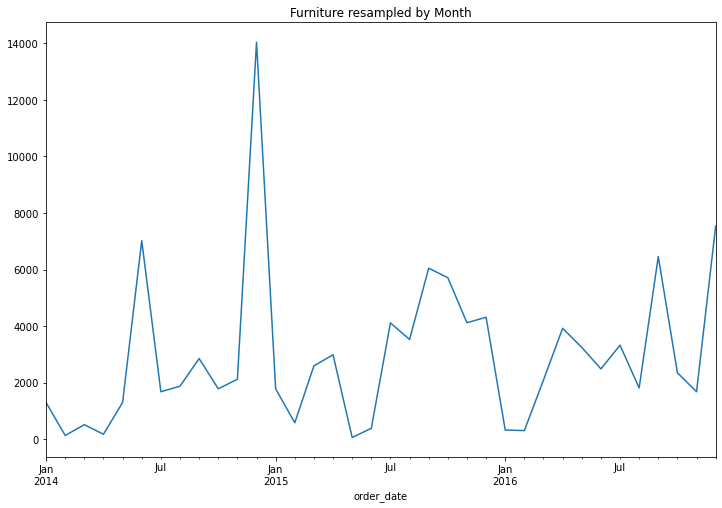

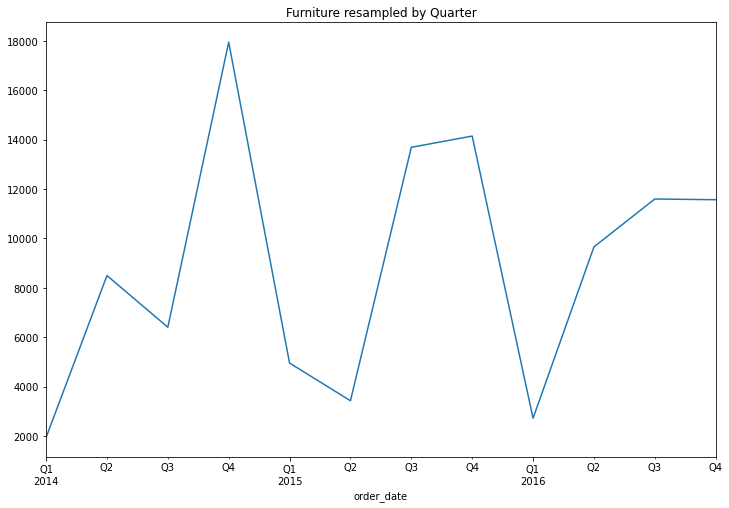

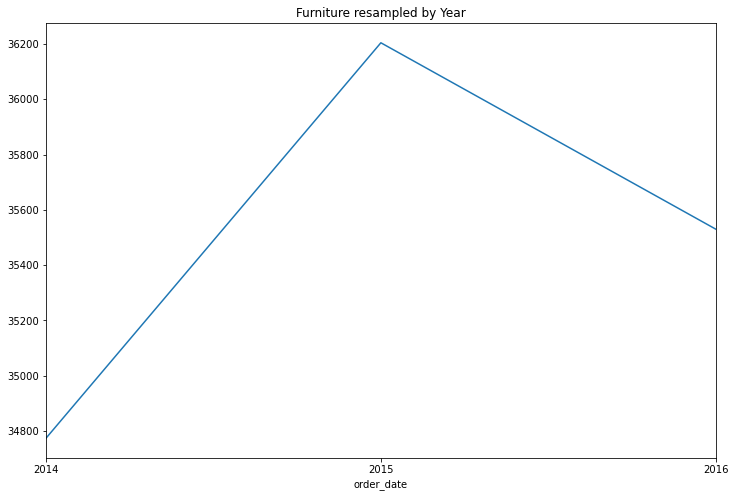

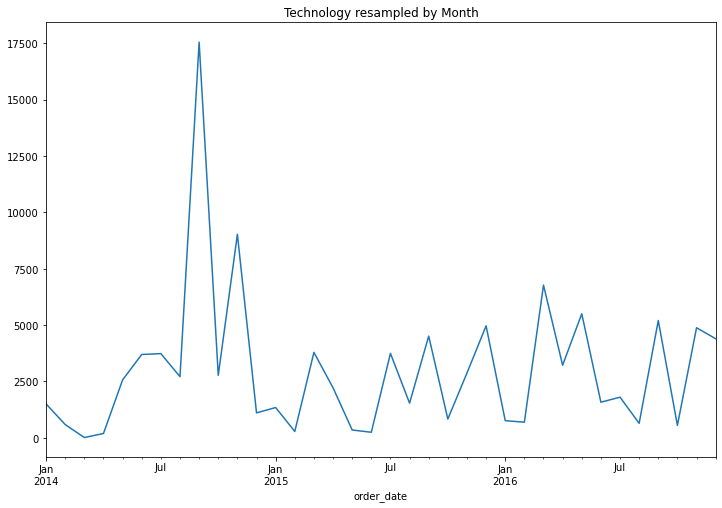

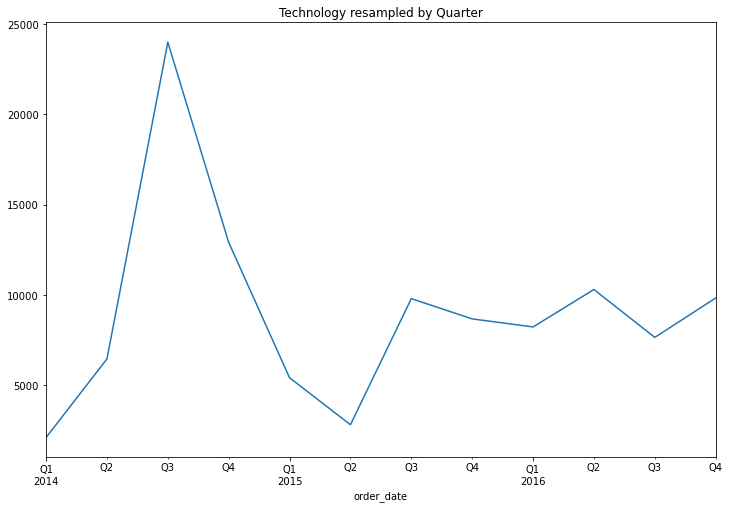

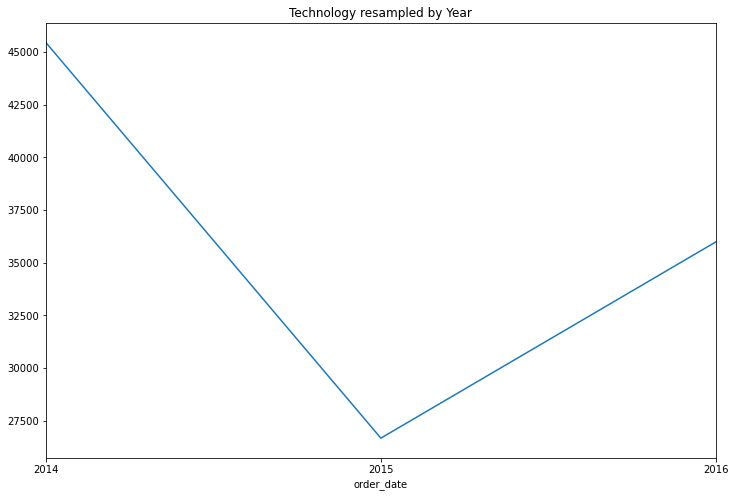

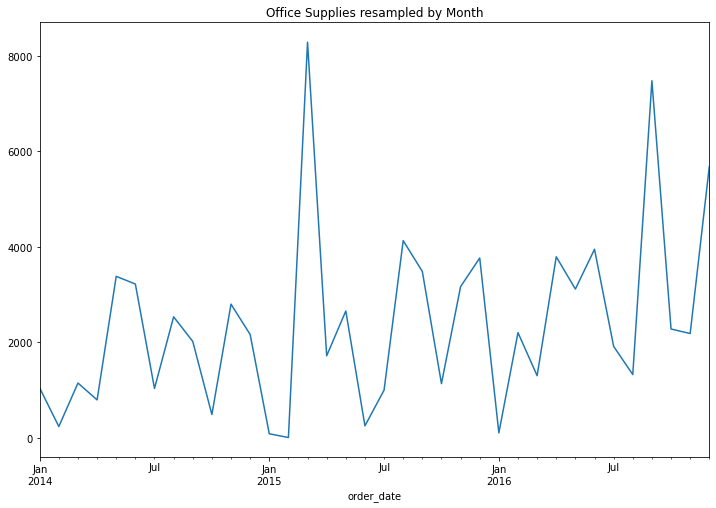

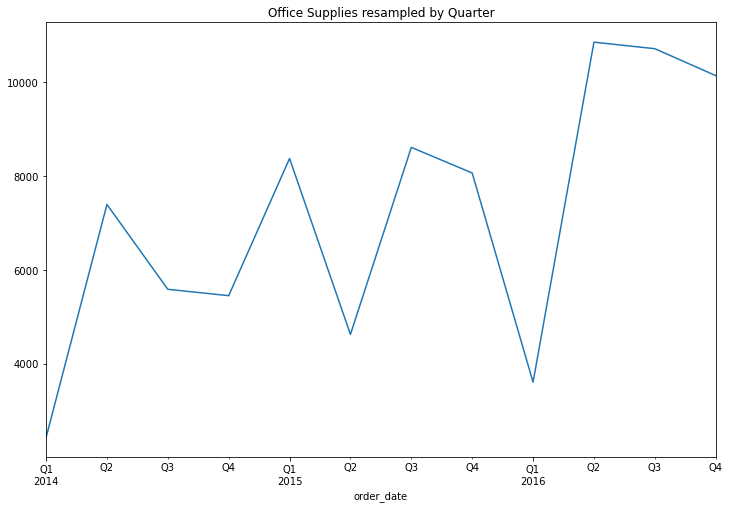

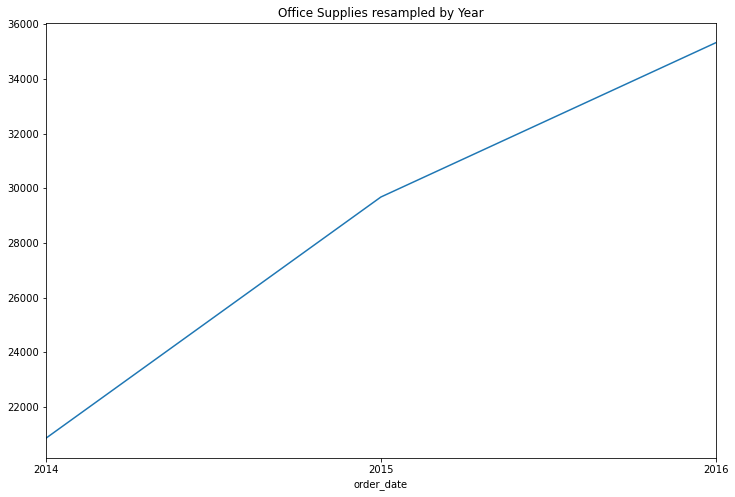

In [8]:
categories = [furniture, technology, office]
category_names = ['Furniture', 'Technology', 'Office Supplies']

periods = ['M', 'Q', 'Y']
period_names = ['Month', 'Quarter', 'Year']

for cat, cat_name in zip(categories, category_names):
    for per, per_name in zip(periods, period_names):
        plt.figure(figsize=(12,8))
        cat['sales'].resample(per).sum().plot()
        plt.title(f'{cat_name} resampled by {per_name}')

#### Which products have the most/least sales volume in the last year?

In [9]:
products_2017 = df['2017'].groupby(by='product_id').sum()[['sales', 'profit', 'quantity']]
products_2017['profit_per_product'] = products_2017.profit / products_2017.quantity
products_2017.sort_values(by='quantity', ascending=False)

sales    profit  quantity  profit_per_product
product_id                                                       
OFF-AP-10002684  1799.384  267.4760      18.0           14.859778
OFF-AR-10003514    65.272   19.9398      17.0            1.172929
OFF-BI-10001036    56.668  -16.4520      16.0           -1.028250
FUR-FU-10001290   673.600  215.5520      16.0           13.472000
OFF-PA-10002377   137.376   50.9480      14.0            3.639143
...                   ...       ...       ...                 ...
OFF-ST-10003722    14.030    4.0687       1.0            4.068700
OFF-EN-10002504    21.744    7.3386       1.0            7.338600
OFF-AR-10000390     3.304    1.0738       1.0            1.073800
TEC-PH-10000439    39.990   11.5971       1.0           11.597100
FUR-FU-10002554    23.990    5.5177       1.0            5.517700

[434 rows x 4 columns]

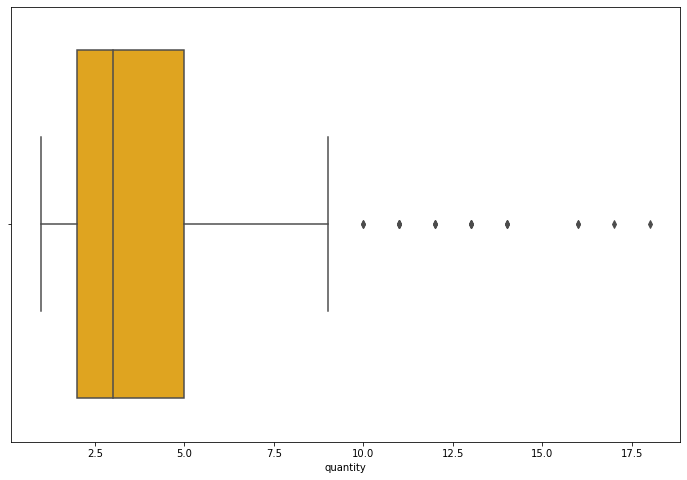

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(products_2017.quantity, palette=canva_palette)
plt.show()

In [11]:
low_vol_prods = products_2017[products_2017.quantity <= 5]
low_vol_prods

sales    profit  quantity  profit_per_product
product_id                                                       
FUR-BO-10001337  514.1650  -30.2450       5.0             -6.0490
FUR-BO-10001619   84.9800   18.6956       1.0             18.6956
FUR-BO-10002206  119.8330  -12.6882       1.0            -12.6882
FUR-BO-10002545  782.9400  203.5644       3.0             67.8548
FUR-BO-10002824  205.3328  -36.2352       2.0            -18.1176
...                   ...       ...       ...                 ...
TEC-PH-10004536  323.9760   20.2485       3.0              6.7495
TEC-PH-10004586  863.8800  107.9850       3.0             35.9950
TEC-PH-10004614  207.0000   51.7500       3.0             17.2500
TEC-PH-10004922  160.7760   10.0485       3.0              3.3495
TEC-PH-10004977  470.3760   52.9173       3.0             17.6391

[334 rows x 4 columns]

In [12]:
low_vol_prods[low_vol_prods.profit_per_product == low_vol_prods.profit_per_product.max()]

sales   profit  quantity  profit_per_product
product_id                                                      
TEC-MA-10000822  3059.982  679.996       2.0             339.998

### Which category has highest profit per product?

In [13]:
# average sales_per_product by category
train.groupby('category').mean()[['profit_per_product']]

profit_per_product
category                           
Furniture                  1.668842
Office Supplies            4.773817
Technology                20.180264

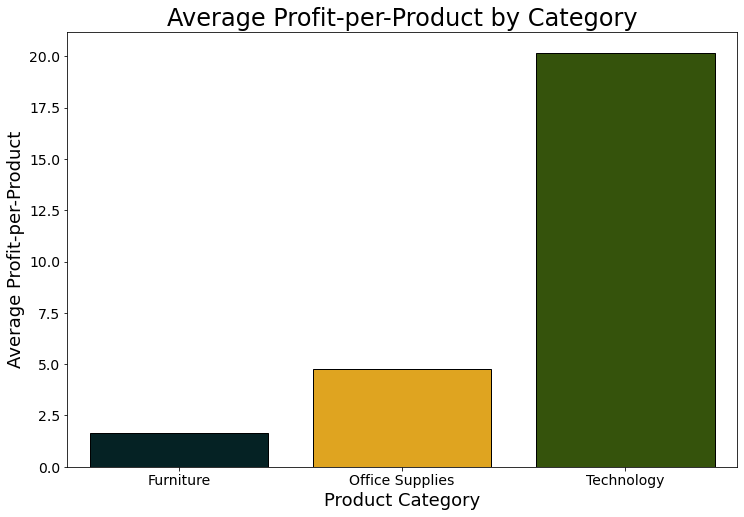

In [14]:
plt.figure(figsize=(12,8))
canva_palette = ['#002729', '#FFB000', '#375F00', '#707E00', '#B39B00']
sns.barplot(data=train, x='category', y='profit_per_product', 
            ci=None, ec='black', palette=canva_palette)
plt.title('Average Profit-per-Product by Category', fontsize=24)
plt.ylabel('Average Profit-per-Product', fontsize=18)
plt.xlabel('Product Category', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')
plt.show()

### Which category has lowest sales volume per product?

In [15]:
# total volume of sales by category
train.groupby('category').sum()[['quantity']]

quantity
category                 
Furniture          1018.0
Office Supplies    2855.0
Technology          891.0

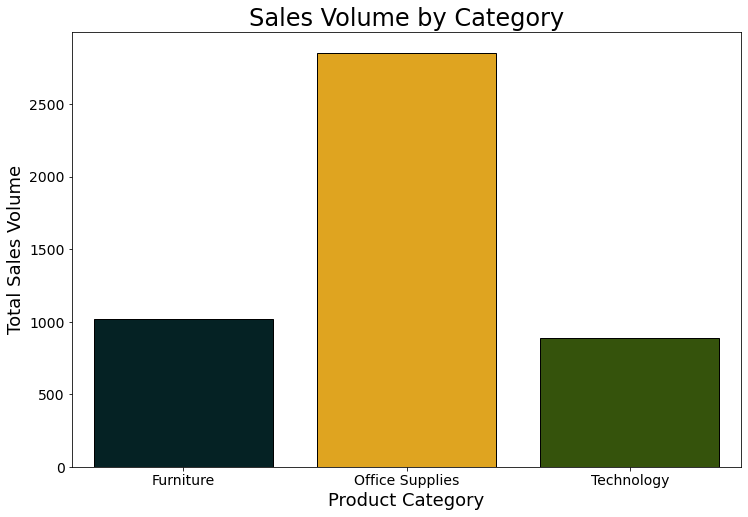

In [16]:
plt.figure(figsize=(12,8))
canva_palette = ['#002729', '#FFB000', '#375F00', '#707E00', '#B39B00']
sns.barplot(data=train, x='category', y='quantity', 
            estimator=sum, ci=None, ec='black', palette=canva_palette)
plt.title('Sales Volume by Category', fontsize=24)
plt.ylabel('Total Sales Volume', fontsize=18)
plt.xlabel('Product Category', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# some standard explorations

#### findings:
- sales/profits tend to be:
    - higher later in the year
    - lower in the middle of the week
- seasonal decomposition shows an upward trend, though this trend is hard to see in the raw data

### univariate

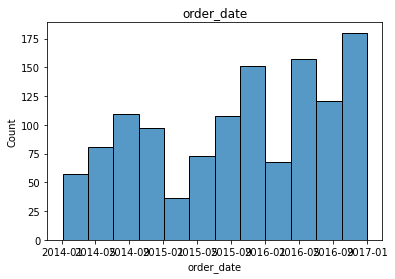

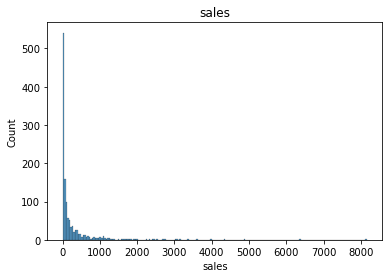

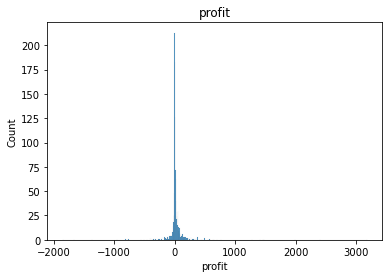

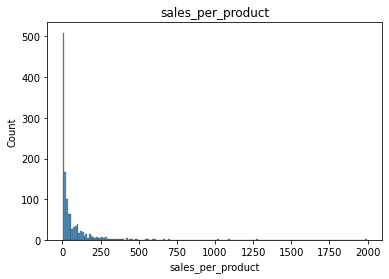

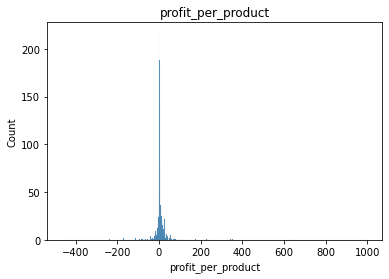

In [17]:
cols = ['order_date', 'sales', 'profit', 'sales_per_product', 'profit_per_product',]

for col in cols:
    sns.histplot(train[col])
    plt.title(col)
    plt.show()

## bivariate

#### sales and profit over time - hue=category

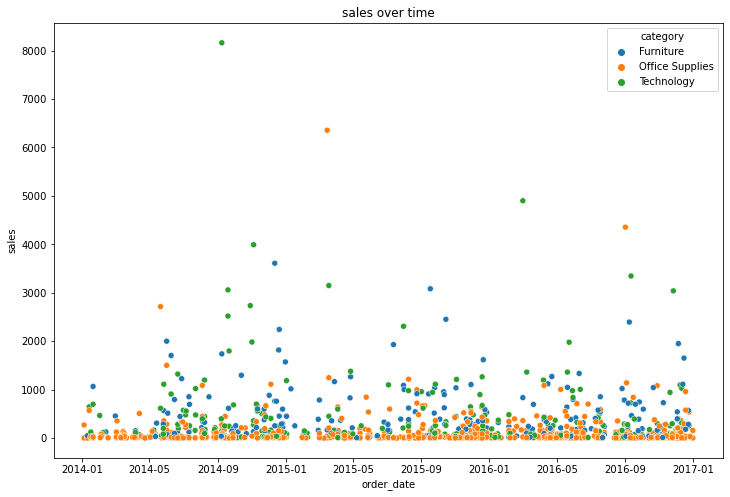

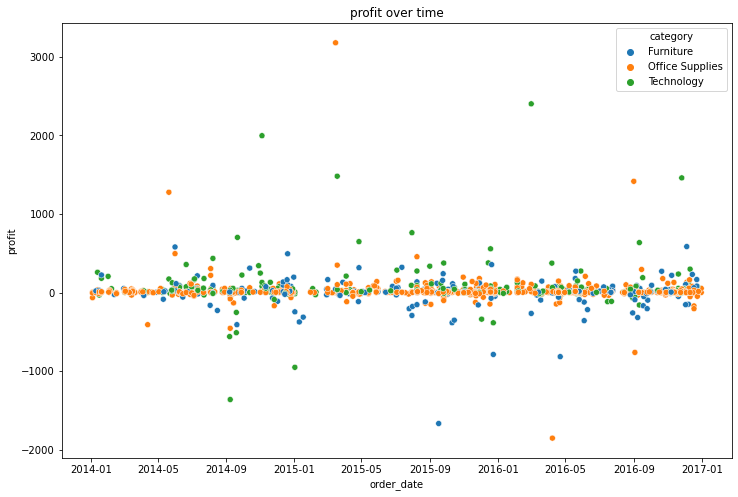

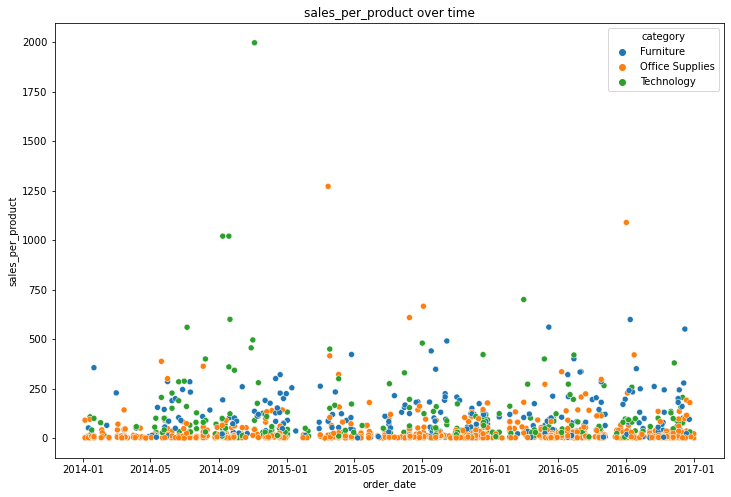

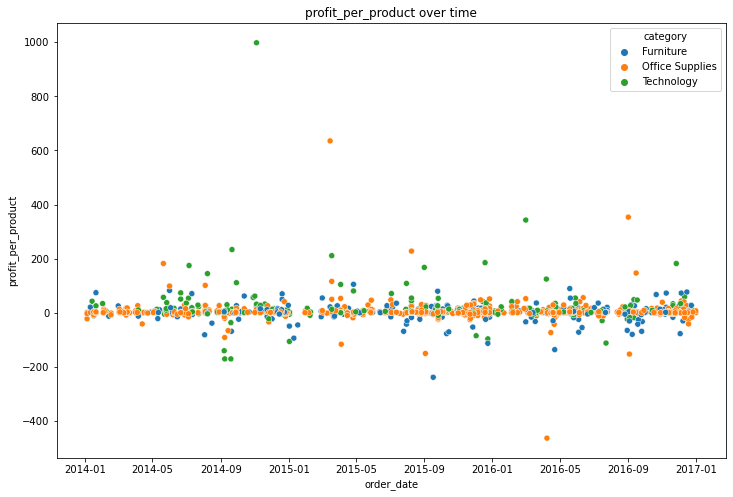

In [18]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='category')
    plt.title(f'{col} over time')
    plt.show()

#### sales and profit over time - hue=region

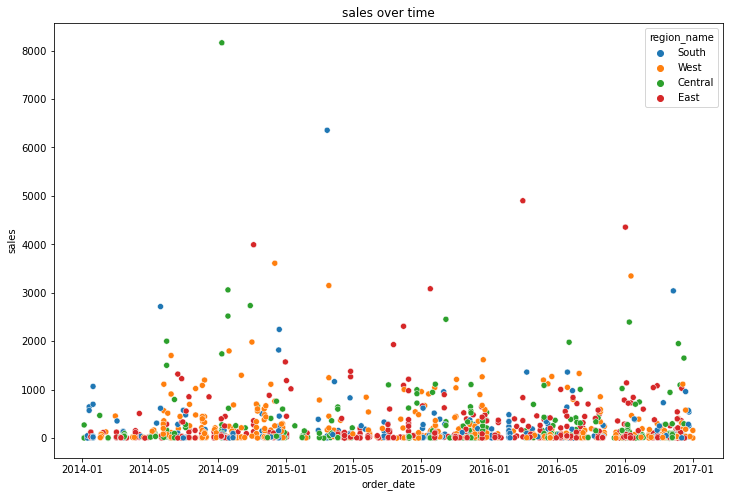

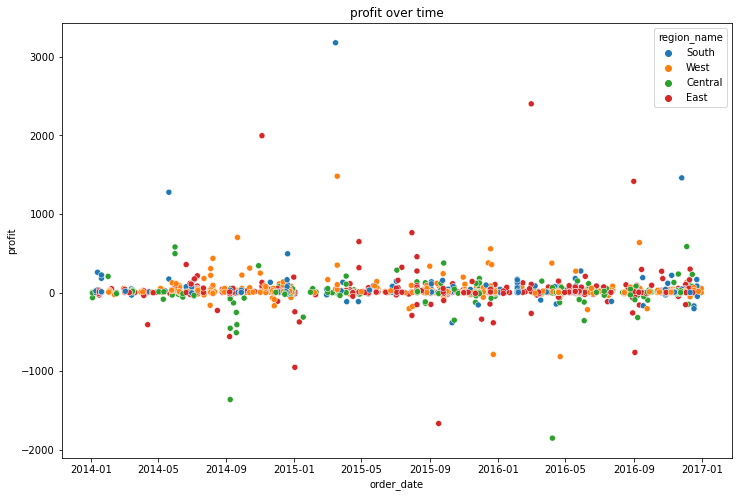

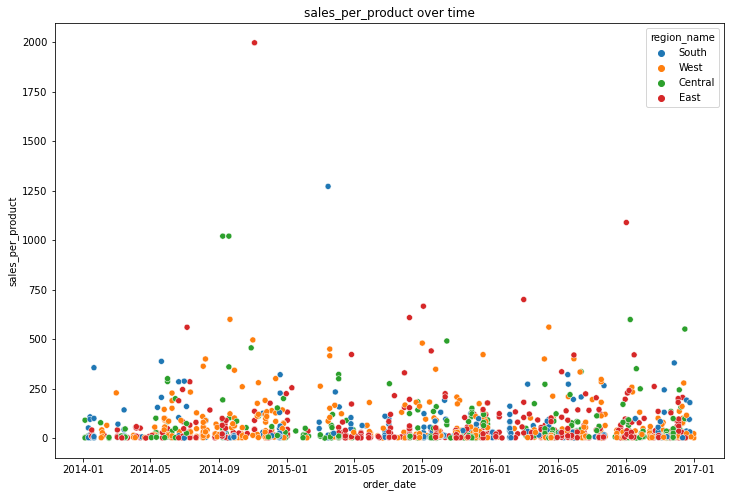

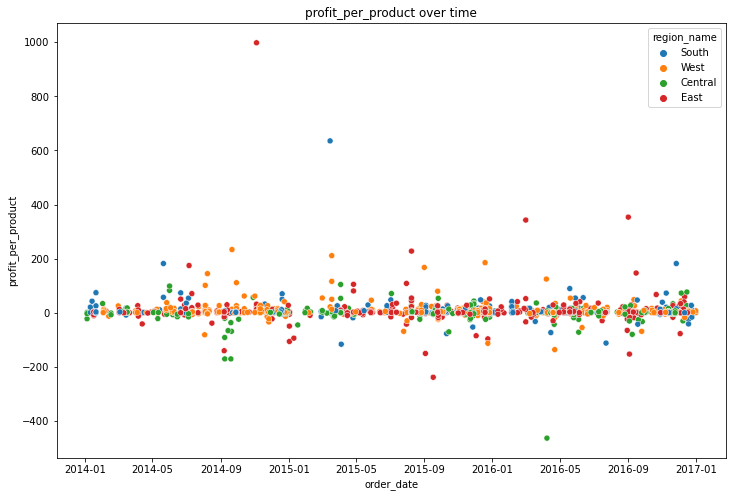

In [19]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='region_name')
    plt.title(f'{col} over time')
    plt.show()

#### sales and profit over time - hue=segment

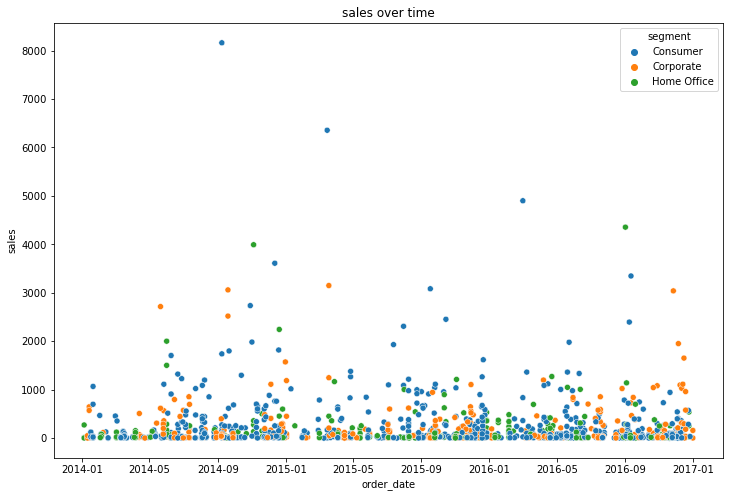

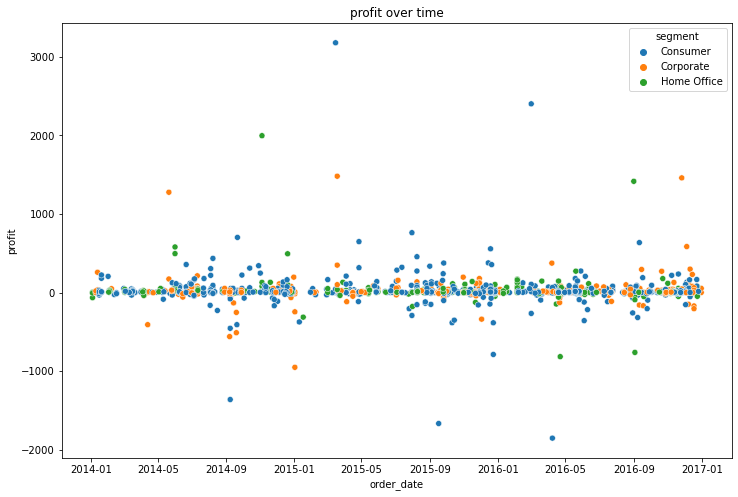

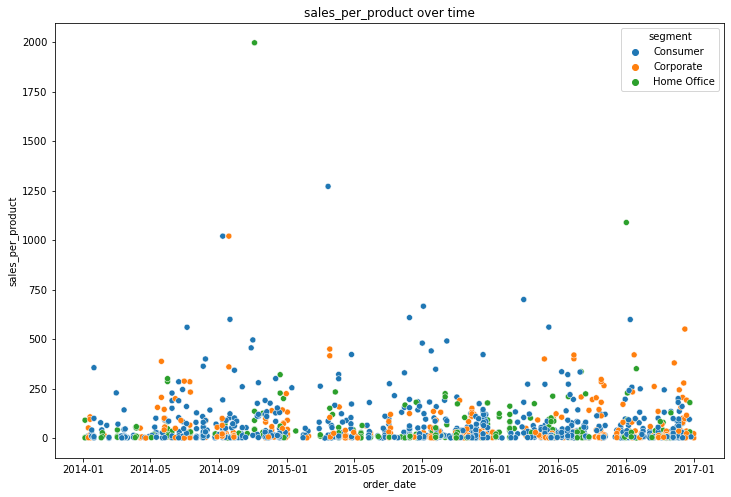

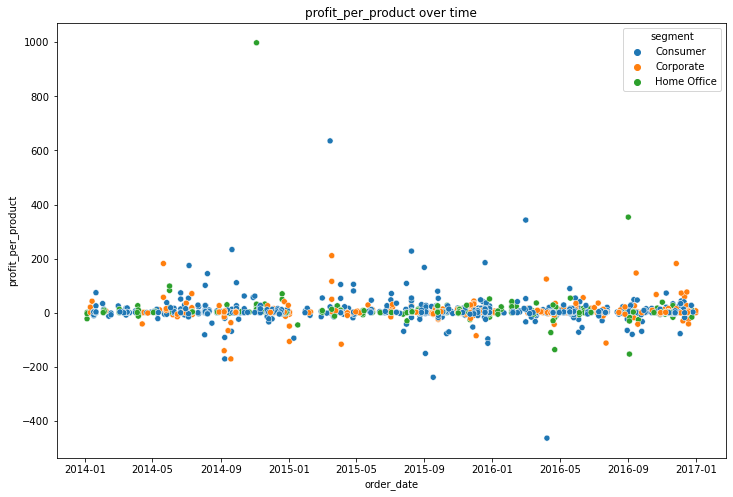

In [20]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='segment')
    plt.title(f'{col} over time')
    plt.show()

#### sales and profit over time - hue=ship_mode

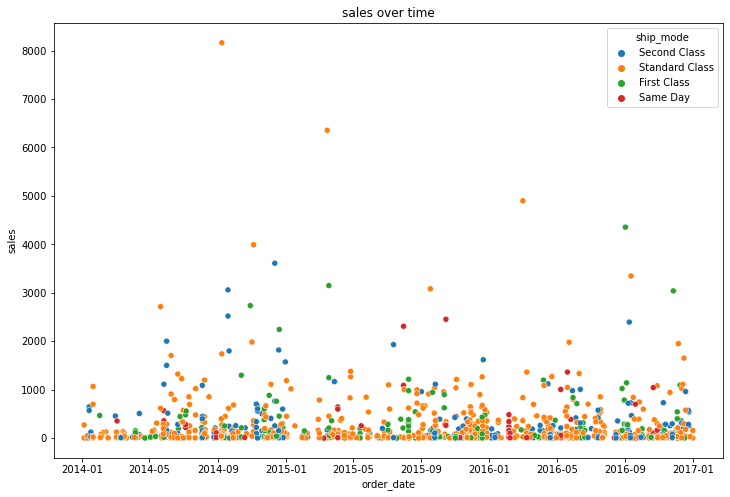

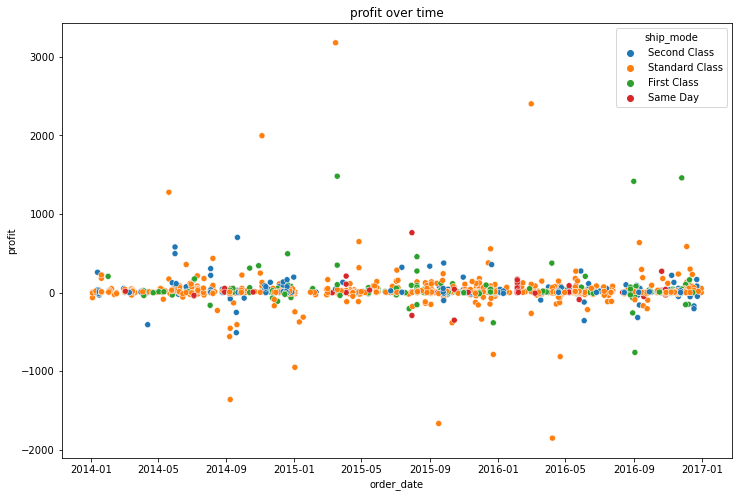

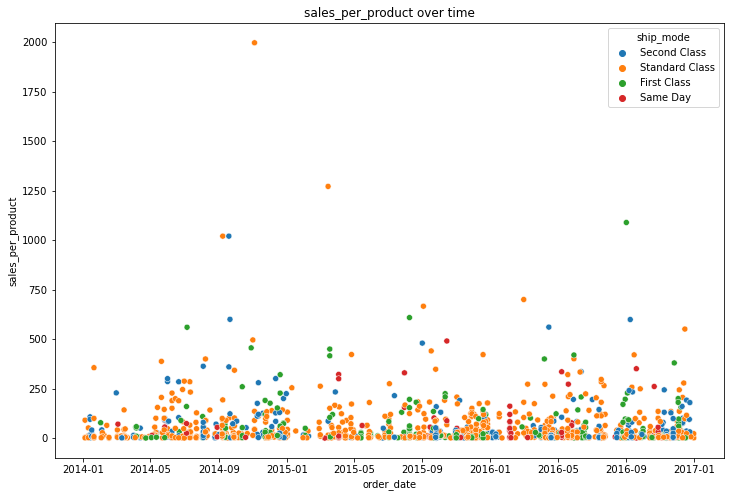

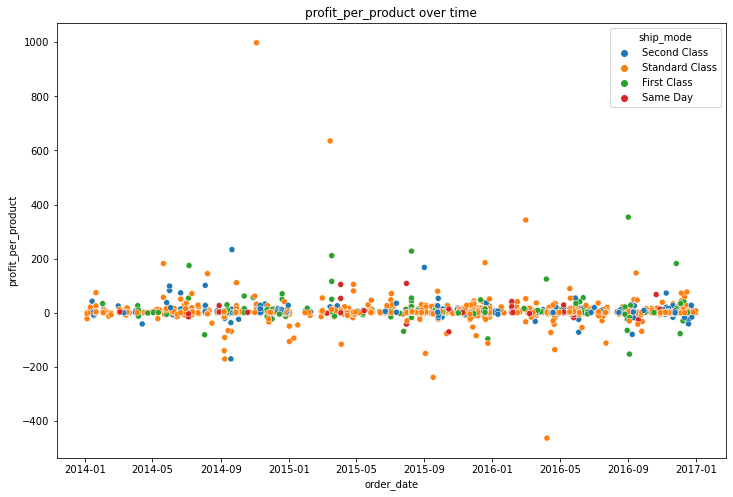

In [21]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='ship_mode')
    plt.title(f'{col} over time')
    plt.show()

#### sales volume by category

#### sales and profit by category

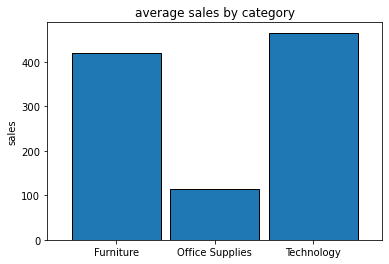

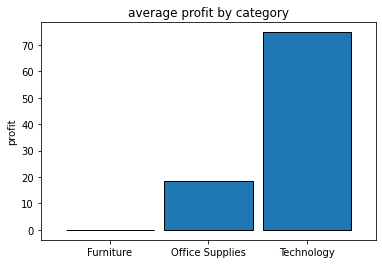

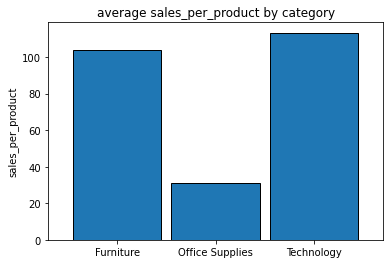

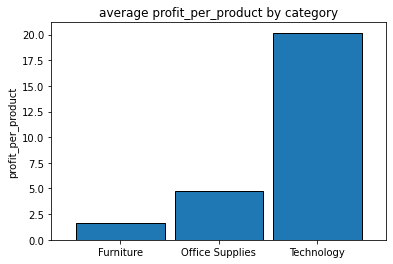

In [22]:
for col in cols:
    train.groupby('category')[col].mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel(None)
    plt.ylabel(col)
    plt.title(f'average {col} by category')
    plt.show()

#### sales and profit by region

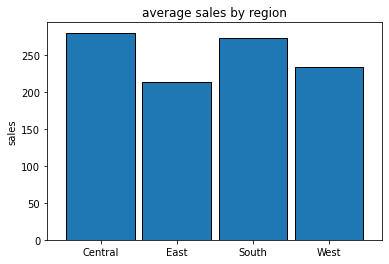

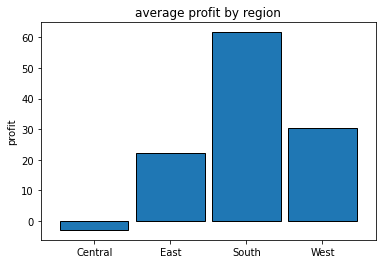

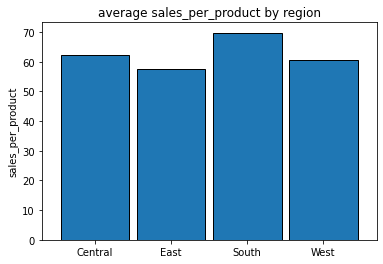

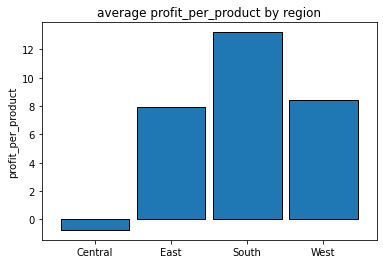

In [23]:
for col in cols:
    train.groupby('region_name')[col].mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel(None)
    plt.ylabel(col)
    plt.title(f'average {col} by region')
    plt.show()

## time series exploration

#### since there are multiple observations on any given day, time series explorations don't make sense unless we resample by day

In [24]:
train_resampled = train.resample('D').sum()

#### averages by month

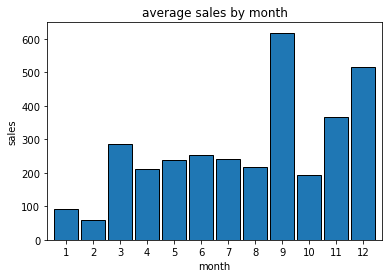

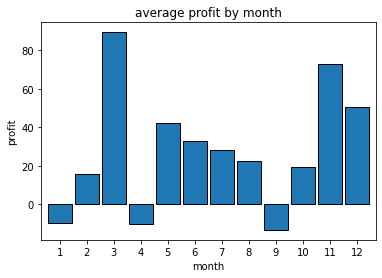

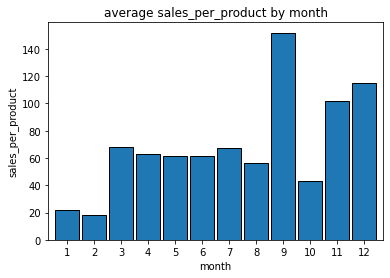

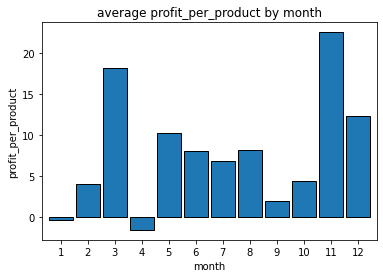

In [25]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    train_resampled[col].groupby(train_resampled.index.month).mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel('month')
    plt.ylabel(col)
    plt.title(f'average {col} by month')
    plt.show()


#### averages by weekday

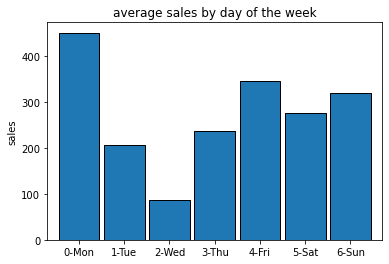

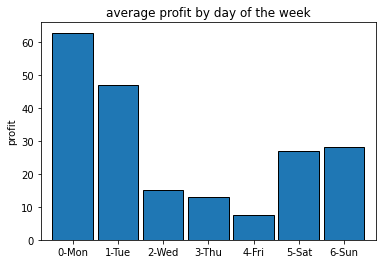

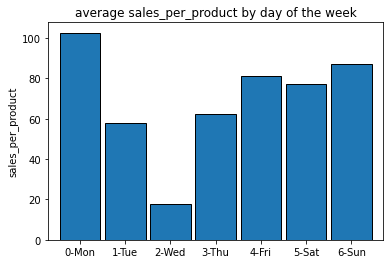

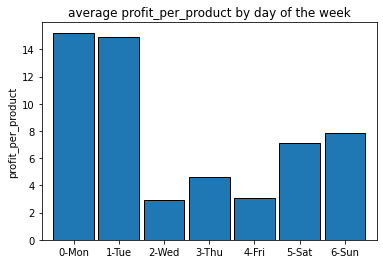

In [26]:
train_resampled['weekday'] = train_resampled.index.weekday.astype(str) + '-' + train_resampled.index.strftime('%a')
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']

for col in cols:
    train_resampled.groupby('weekday')[col].mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel(None)
    plt.ylabel(col)
    plt.title(f'average {col} by day of the week')
    plt.show()

#### resampled averages

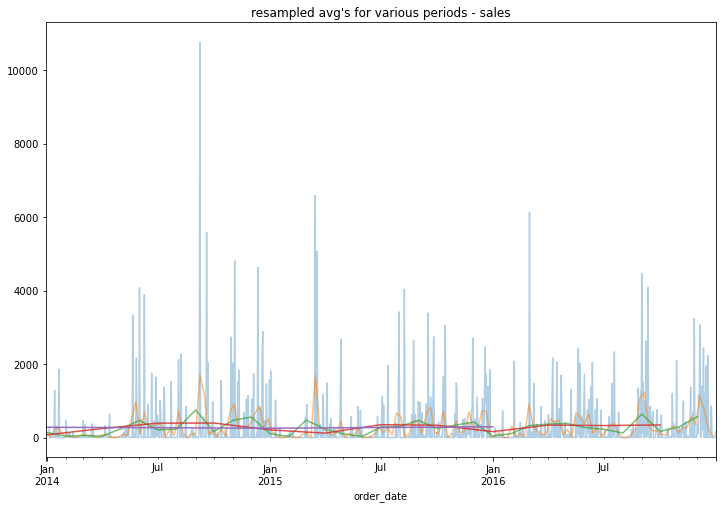

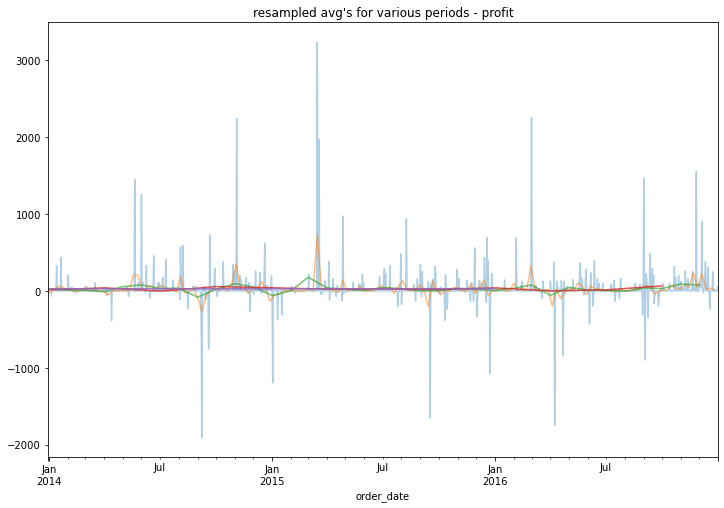

In [27]:
periods = ['D', 'W', 'M','Q', 'Y']
cols = ['sales', 'profit']
for col in cols:
    plt.figure(figsize=(12,8))
    plt.title(f'resampled avg\'s for various periods - {col}')
    alpha = .2
    for per in periods:
        alpha += .15
        train_resampled[col].resample(per).mean().plot(alpha=alpha) 
    plt.show()

#### change from period-to-period

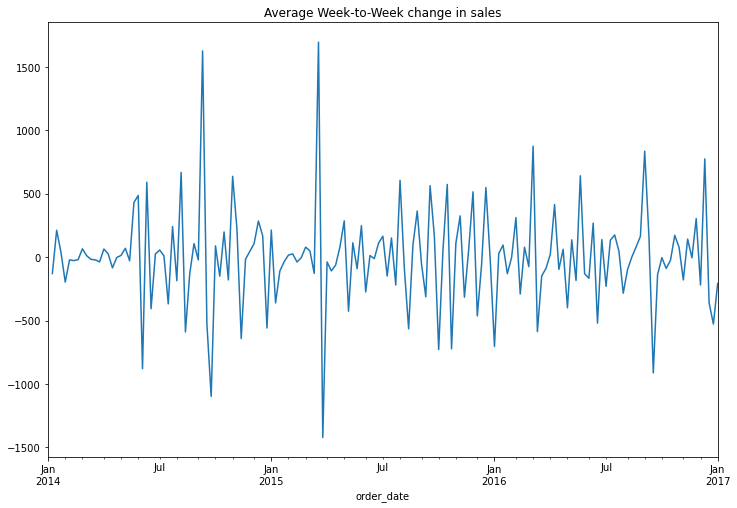

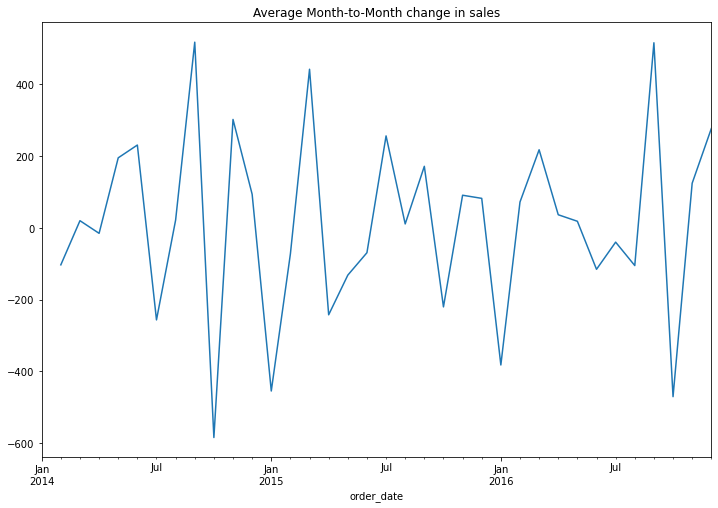

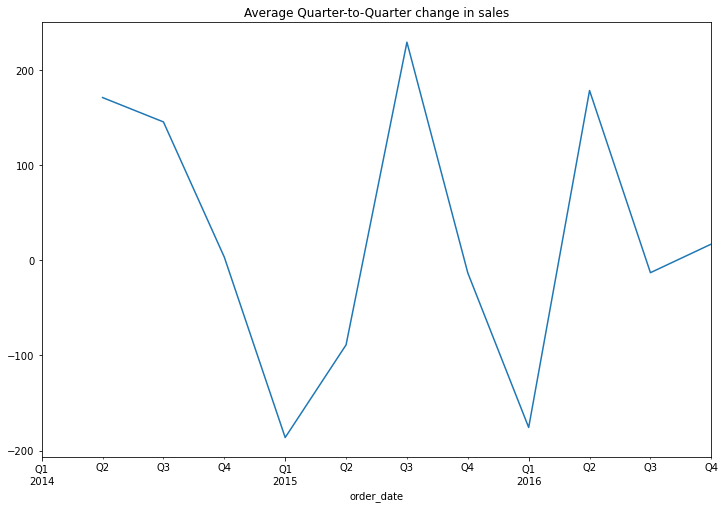

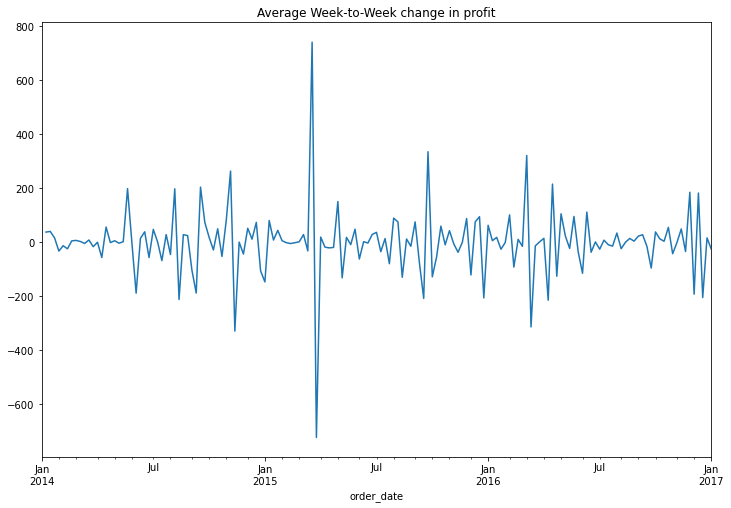

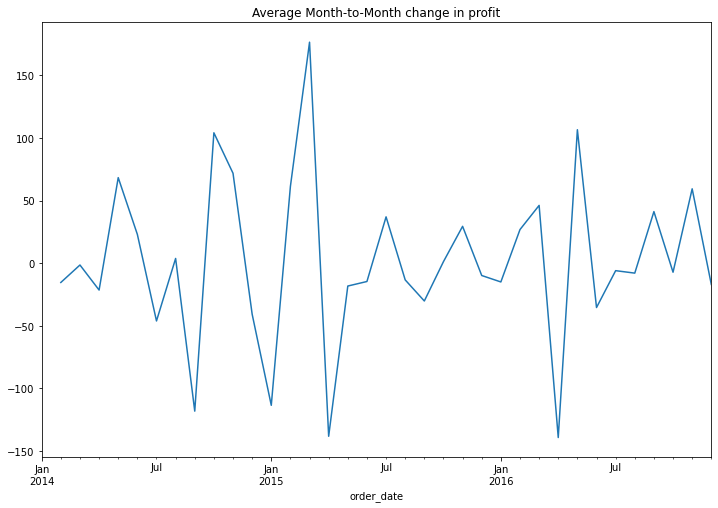

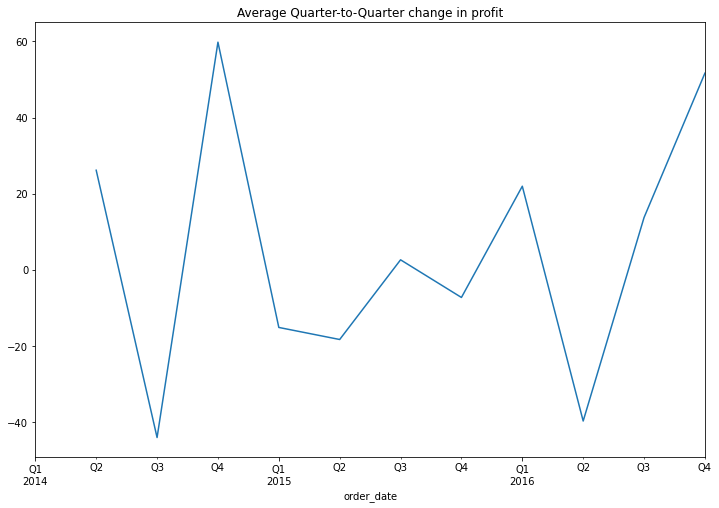

In [28]:
per = ['W', 'M', 'Q'] # list of periods by which to resample
per_name = ['Week', 'Month', 'Quarter'] # readable names of those periods
cols = ['sales', 'profit']
for col in cols:
    for i in range(len(per)):
        plt.figure(figsize=(12,8))
        train_resampled[col].resample(per[i]).mean().diff().plot(title=f'Average {per_name[i]}-to-{per_name[i]} change in {col}')
        plt.show()

#### Lag plots

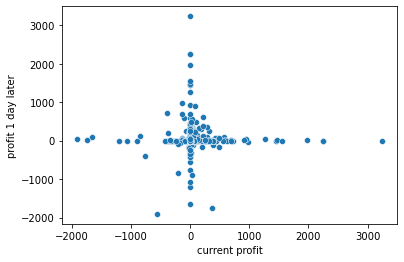

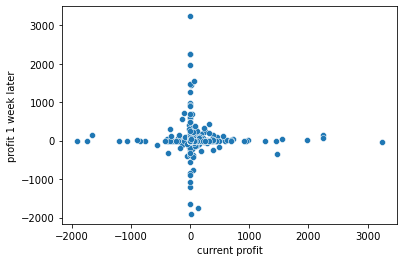

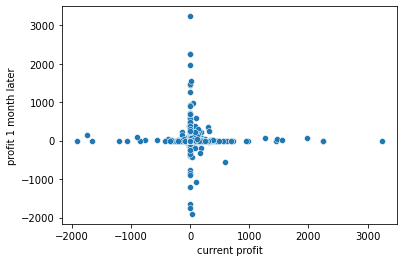

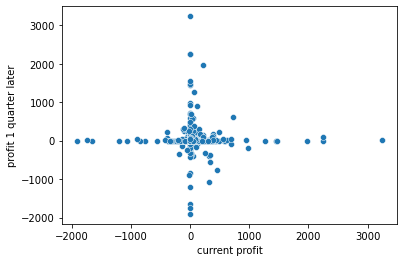

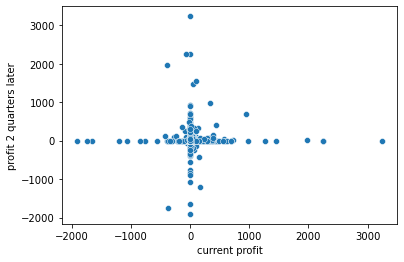

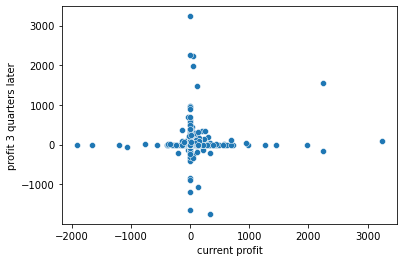

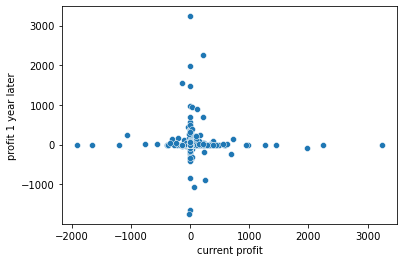

In [29]:
lag_times = [1, 7, 30, 30*3, 30*6, 30*9, 365]
lag_labels = ['1 day', '1 week', '1 month', '1 quarter', '2 quarters', '3 quarters', '1 year']

target = 'profit'
for lag_time, lag_label in zip(lag_times, lag_labels):
    sns.scatterplot(data=train_resampled, x=target, y=train_resampled[target].shift(-lag_time))
    plt.xlabel(f'current {target}')
    plt.ylabel(f'{target} {lag_label} later')
    plt.show()

#### seasonal decomposition

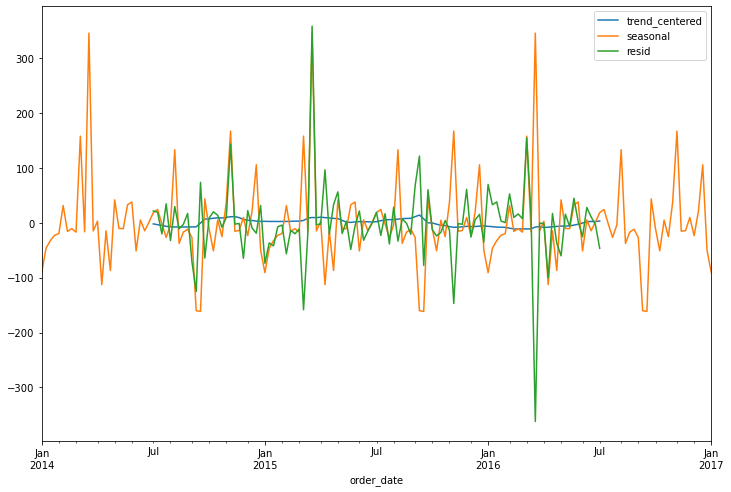

In [30]:
import statsmodels.api as sm

target = 'profit'
y = train_resampled[target].resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({'y': result.observed,
                             'trend': result.trend,
                             'seasonal': result.seasonal,
                             'resid': result.resid,})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot(figsize=(12,8))
plt.show()